**#Chapter 4#**

**1.a) Question 5**

**1.a.a)    Question 5** 

If the Bayes decision boundary is linear, we would expect QDA to perform well on the training set. One reason being its higher flexibility, which can result in a closer fit to the training data. But at times, this increased flexibility can also lead to overfitting in case we have a small sample size. 

On the other hand,for test set, we would expect LDA to perform better than QDA. One reason being that LDA assumes a linear decision boundary, which is consistent with the linear Bayes decision boundary. Additionally, LDA produces lower vairance in results due to the simple model it encompasses. The opposite characteristic of QDA producing variance that is not offset by bias makes it an overly flexible model and prone to overfitting.This also throws light on the bias-variance trade-off in model selection between LDA and QDA.

**1.a.b)   Question 5**

If the Bayes decision bounary is not linear, we expect QDA to perform better on the training set. This is due to its ability to fit non-linear decision boundaries. 

On the test set, we would again expect QDA to perform better. But this depends on the characteristics of the data distribution, the type of nonlinearity and the sample size too.

**1.a.c)    Question 5**


As the sample size n increases, we expect the test prediction accuracy of QDA relative to LDA to improve. When the sample size is small, the higher flexibility of QDA can lead to overfitting and thus it will fit the training data very well. It may not work the same with new data or test data. As the sample size increases,  the higher flexibility would result in generating a better decision boundary thus by reducing the risk of overfitting. Thus the test prediction accuracy can improve.

For LDA, which already has a lower level of flexibility can result in lower variance and lower overfitting compared to QDA. Also LDA's lower flexibility nature can result lower accuracy for non linear data. When the sample size increases, the lower nature of the model and the lower variance may not produce a accurate model, thus resulting in lower test prediction accuracy.



**1.a.d)     Question 5**

False.

Even if the Bayes decision boundary is linear, using QDA may not result in a superior test error rate compared to LDA. Given that QDA is more flexible than LDA, it leads to cases of overfitting, usually with a small sample size. Thus, this characteristic can produce a higher test error rate for QDA compared to LDA. Another explanation from LDA's side could be that, LDA is less flexible and it produces a linear decision boundary. Thus it can result in a lower overfitting and lower variance too which can result in lower test error rates. This is true usually when the sample size is small. 


**1.b) Question 6**

**1.b.a)    Question 6**

The probability that a student who studies for 40 h and has an undergrad GPA of 3.5 gets an A in the class

p = A/B

A = exp(β0+β1X1+β2X2) 

B = 1 + exp(β0+β1X1+β2X2)

p=(e−6+0.05×40+1×3.5)/ (1+e−6+0.05×40+1×3.5) 

p = 0.378

The probability that a student who studies for 40 h and has an undergrad GPA of 3.5 gets an A in the class is 37.8%

**1.b.b)   Question 6**

The hours the student in part (a) need to study to have a 50 % chance of getting an A in the class

Given p = 0.5


0.5 = (e−6 + 0.05 * X1+1×3.5) / (1 + e−6 + 0.05 * X1 + 1*3.5)

X1 =(log(1) + 2.50)/ 0.05 = 50

The hours the student in part (a) need to study to have a 50 % chance of getting an A in the class is 50

**1.c) Question 7**

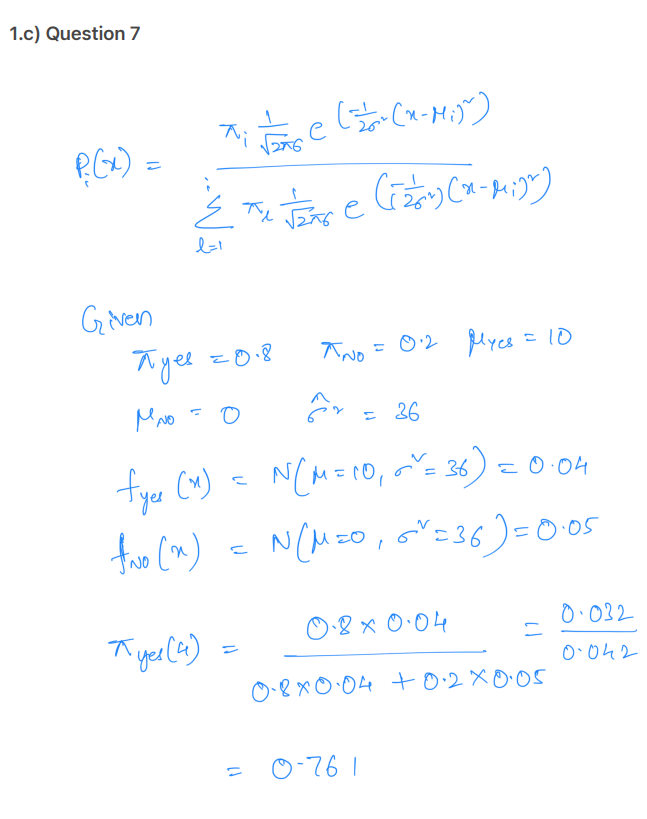

Assuming that X follows a normal distribution, the probability that a company will issue a dividend this year given that its percentage profit was X = 4 last
year is 76.1%

**1.d Question 14)**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.metrics import accuracy_score,  confusion_matrix, roc_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
from sklearn.linear_model import LogisticRegression 


In [2]:
auto_data = pd.read_csv("Data-Auto.csv", na_values = ["?"])
auto_data.dropna(inplace = True)
auto_data.head()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,5,17.0,8,302.0,140,3449,10.5,70,1,ford torino


**1.d.a)    Question 14**

Create a binary variable, mpg01, that contains a 1 if mpg contains
a value above its median, and a 0 if mpg contains a value below
its median. You can compute the median using the median()
function. Note you may find it helpful to use the data.frame()
function to create a single data set containing both mpg01 and
the other Auto variables.

In [3]:
# 1.d.a

auto_data['mpg01'] = np.where(auto_data['mpg']>=auto_data['mpg'].median(), 1, 0)
auto_data.head()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,5,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


**1.d.b)    Question 14**

Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other
features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings

Text(0.5, 1, 'Pair plot between various variables, with hue as mpg01 variables')

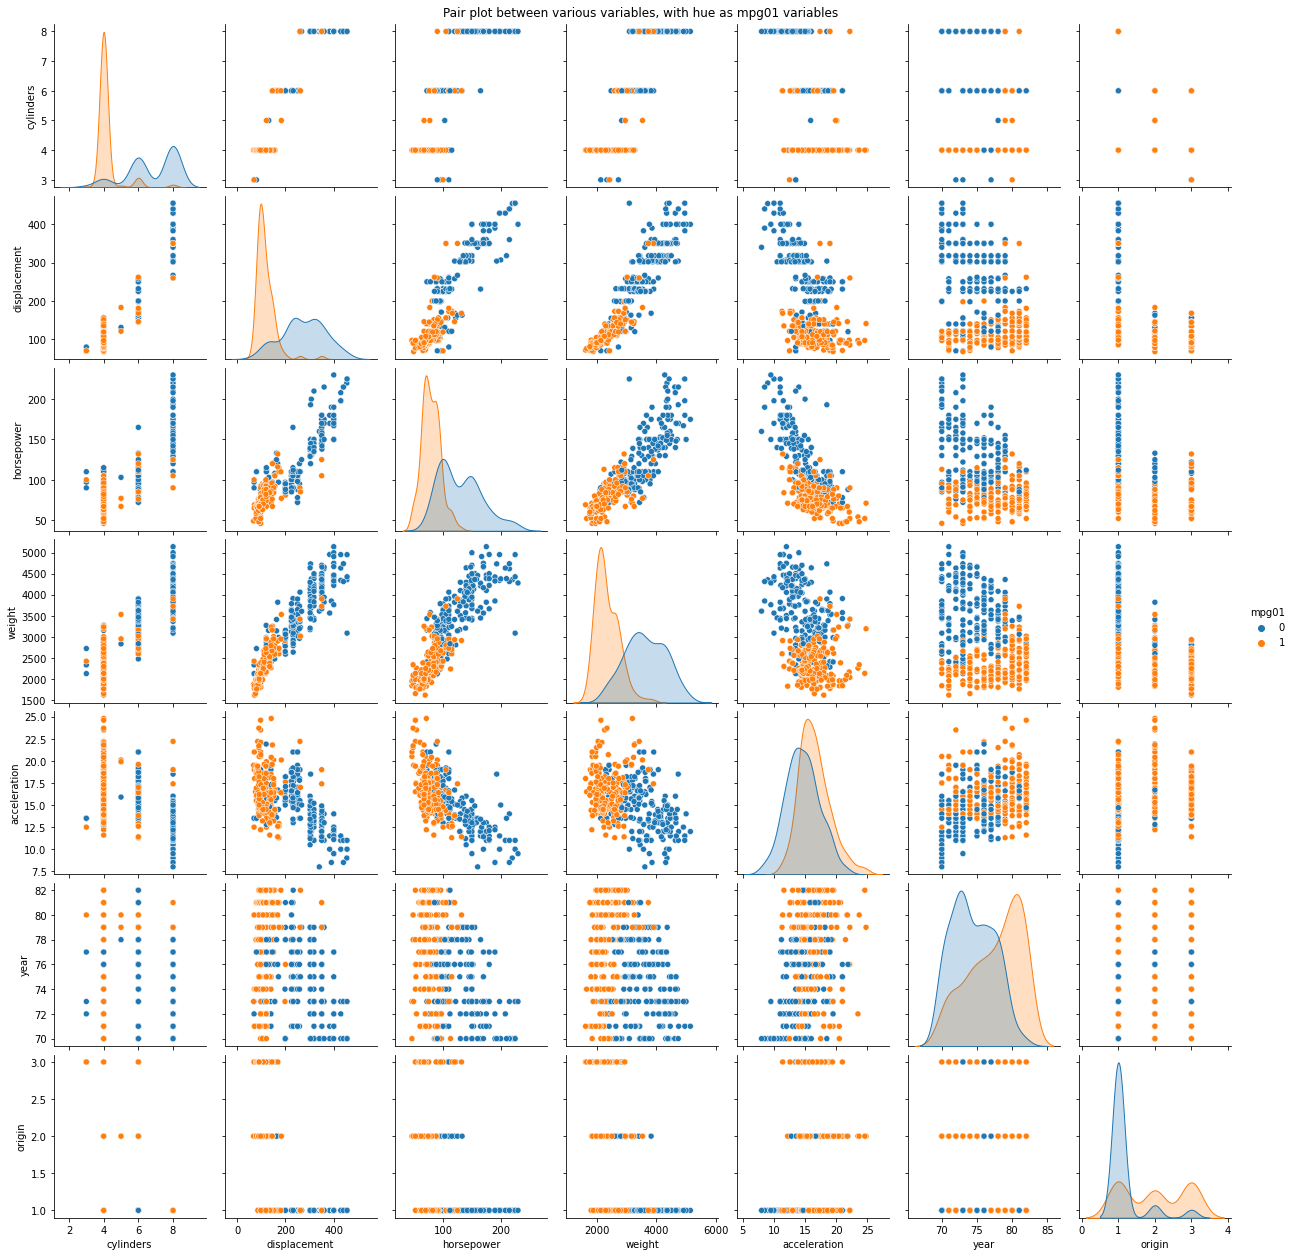

In [4]:
#1.d.b

#making a pair plot to investigate the association between mpg01 and other columns

auto_columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
                         'year', 'origin']

#hue is mpg01
plot1 = sns.pairplot(auto_data, vars=auto_columns, hue='mpg01')
plot1.fig.suptitle("Pair plot between various variables, with hue as mpg01 variables", y=1) 

C:\Users\saiom\anaconda3\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


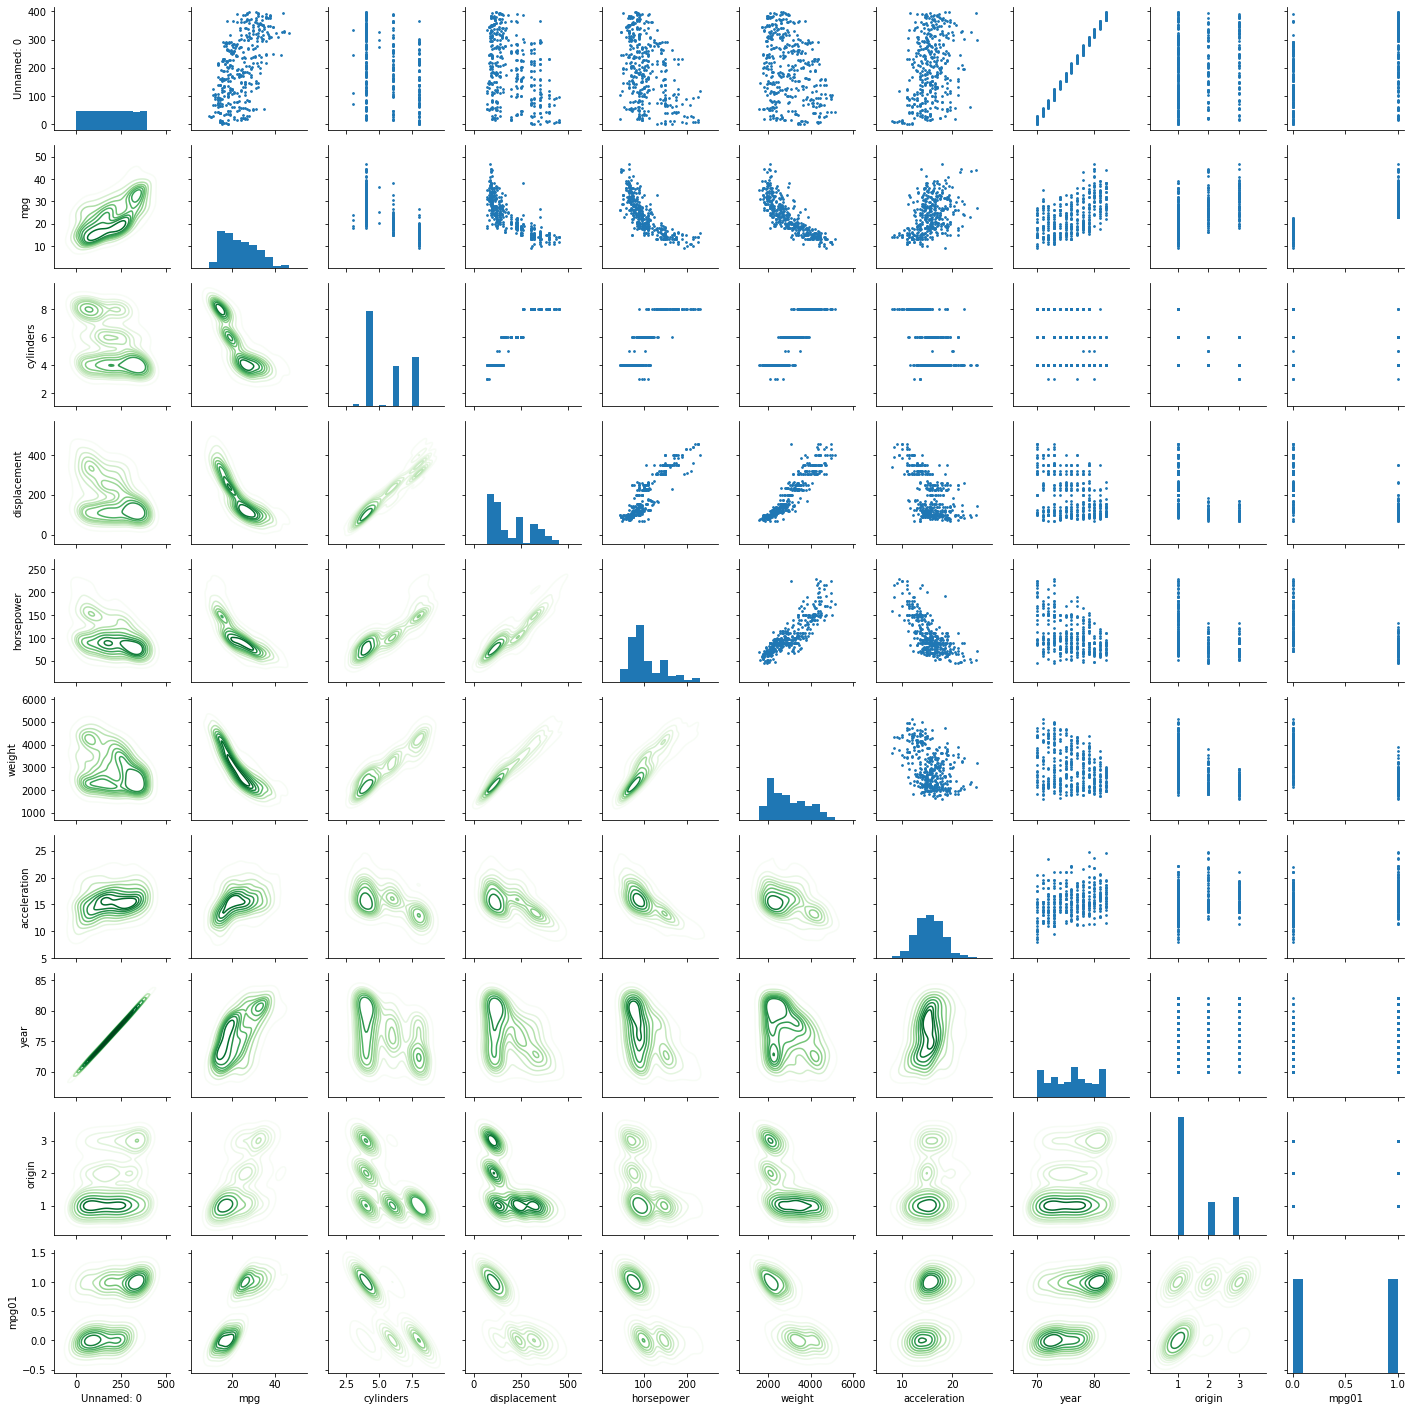

In [5]:
pgplot = sns.PairGrid(auto_data, size=2)
pgplot.map_upper(plt.scatter, s=3)
pgplot.map_diag(plt.hist)
pgplot.map_lower(sns.kdeplot, cmap="Greens")


We used the column mpg01 as hue in the above scatter matrix and generated a plot using pairplot from sns. 

As shown above, mpg01 is shown in Orange and 0 in Blue. As an example we can observe the relation between weight and acceleration are clearly differet with mpg01 as 0 and 1. Similarly we can observe that there exists high correlation between mpg01 and other variables such as cylinders, weight etc. 




Text(0.5, 1, 'Pair plot between various variables, with hue as mpg01 variables')

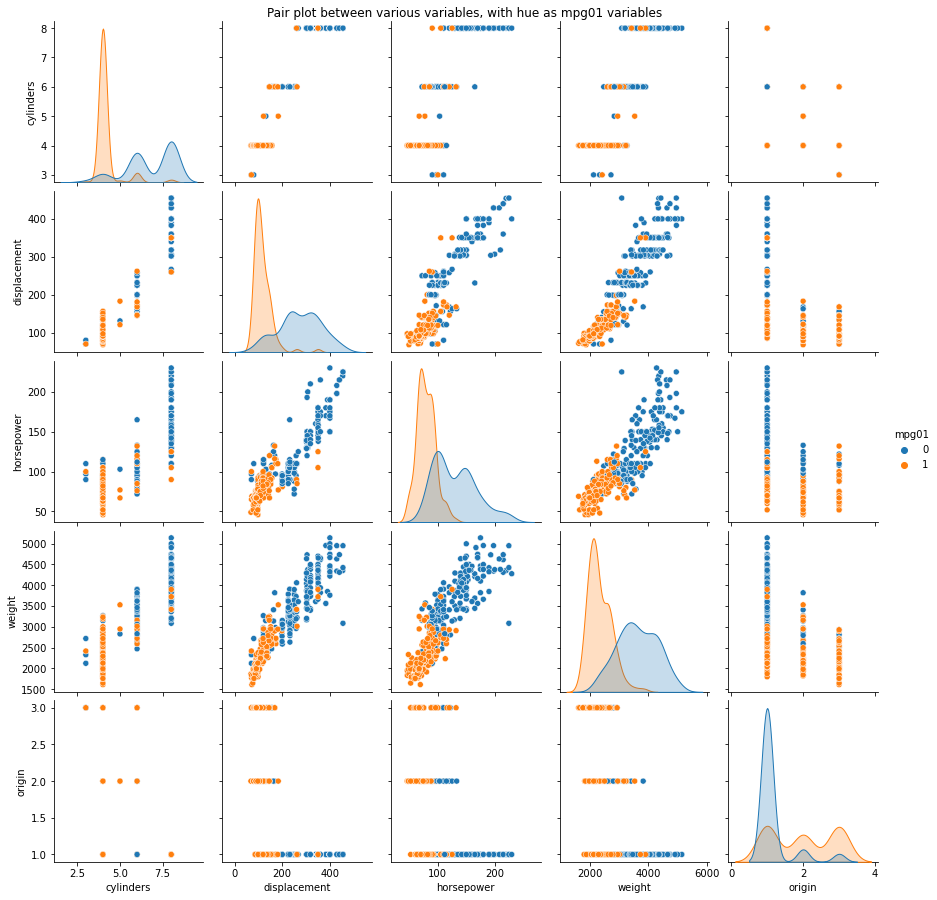

In [6]:
#Using the variables that have high relation with mpg01

auto_columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'origin']

#hue is mpg01
plot1 = sns.pairplot(auto_data, vars=auto_columns, hue='mpg01')
plot1.fig.suptitle("Pair plot between various variables, with hue as mpg01 variables", y=1) 

We can explore this using a correlation function

In [7]:
auto_data.corr()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
Unnamed: 0,1.000000,0.586330,-0.360275,-0.387146,-0.422925,-0.321747,0.290985,0.996780,0.200576,0.440467
mpg,0.586330,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209,0.836939
cylinders,-0.360275,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,-0.759194
displacement,-0.387146,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,-0.753477
horsepower,-0.422925,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.667053
weight,-0.321747,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,-0.757757
acceleration,0.290985,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,0.346822
year,0.996780,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,0.429904
origin,0.200576,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,0.513698
mpg01,0.440467,0.836939,-0.759194,-0.753477,-0.667053,-0.757757,0.346822,0.429904,0.513698,1.000000


As seen in the scatter plot, we can also observe in the correlation matrix that there is good correlation between many variables such as weight, displacement, cylinders with mpg01

**1.d.c)    Question 14**

In [8]:
#1.d.c Split the data into a training set and a test set.

#For splitting, we are using all the variables for now. 
#Later on before running a model, we keep those variables only which are deemed useful
    
x = auto_data.values
y = auto_data['mpg01'].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.50, random_state = 22)

print( 'Lenght of Train set = ' + str(len(X_train)) )
print('Length of Test set = ' +str(len(X_test)))

print('The split is 0.5 as per the test_size mentioned in train_test_split')

Lenght of Train set = 196
Length of Test set = 196
The split is 0.5 as per the test_size mentioned in train_test_split


**1.d.d)      Question 14**

Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in
(b). What is the test error of the model obtained?

In [9]:
#1.d.d

# As seen above, we have found the below variables are very useful to the model
x = auto_data[['cylinders', 'displacement', 'weight', 'horsepower', 'origin']].values
#x = auto_data[auto_columns]
y = auto_data['mpg01'].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.50, random_state = 22)



lda_1 = LinearDiscriminantAnalysis()
lda_1.fit(X_train, y_train)
print('Accuracy score: ')
print(accuracy_score(y_test, lda_1.predict(X_test)))

print('Test error: ')
print(1 - lda_1.score(X_test, y_test))

Accuracy score: 
0.8877551020408163
Test error: 
0.11224489795918369


In [10]:
# Compute the accuracy
accuracies = {}

y_pred = lda_1.predict(X_test)
accuracies['LDA'] = accuracy_score(y_test, y_pred)

# Print the accuracies
for model, accuracy in accuracies.items():
    print(f'{model} accuracy: {round(accuracy, 4)*100}%')
    
    


LDA accuracy: 88.78%


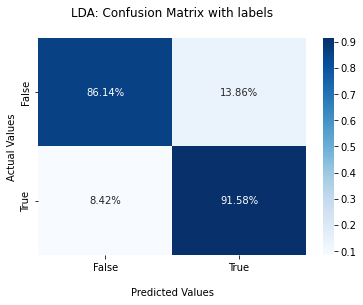

In [11]:
# Confusion Matrix
ax = sns.heatmap(
    confusion_matrix(
        y_test,
        y_pred,
        normalize = 'true'
    ),
    annot=True,
    fmt='.2%',
    cmap='Blues'
)

ax.set_title('LDA: Confusion Matrix with labels\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

**1.d.e**

Perform QDA on the training data in order to predict mpg01
using the variables that seemed most associated with mpg01 in
(b). What is the test error of the model obtained?

In [12]:
#1.d.e

qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)


y_pred_qda = qda_model.predict(X_test)

print('Accuracy Score: ' + str(accuracy_score(y_test, y_pred)))

print('Test error: ' + str(1 - qda_model.score(X_test, y_test)))
    


Accuracy Score: 0.8877551020408163
Test error: 0.11734693877551017


In [13]:
accuracies['QDA'] = accuracy_score(y_test, y_pred_qda)

# Print the accuracies
for model, accuracy in accuracies.items():
    print(f'{model} accuracy: {round(accuracy, 4)*100}%')
    
    

LDA accuracy: 88.78%
QDA accuracy: 88.27000000000001%


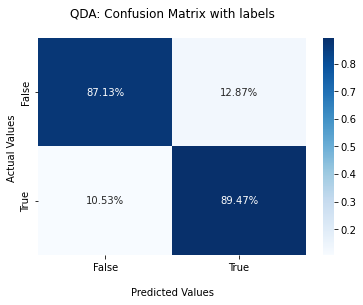

In [14]:
ax = sns.heatmap(
    confusion_matrix(
        y_test,
        y_pred_qda,
        normalize = 'true'
    ),
    annot=True, 
    fmt='.2%',
    cmap='Blues'
)

ax.set_title('QDA: Confusion Matrix with labels\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

**1.d.f    Question 14**

Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with
mpg01 in (b). What is the test error of the model obtained?

Accuracy Score: 0.8877551020408163
Test error: 
0.11734693877551017


C:\Users\saiom\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


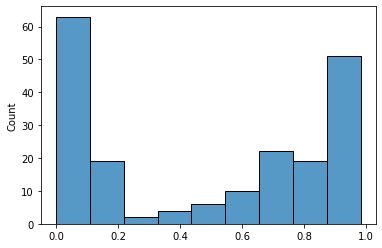

In [15]:
#1.d.f

lr_1 = LogisticRegression()
lr_1.fit(X_train, y_train)

print('Accuracy Score: ' + str(accuracy_score(y_test, y_pred)))

y_pred_log = lr_1.predict_proba(X_test)
y_pred_log[:5]

y_pred_log = y_pred_log[: ,1]

sns.histplot(y_pred_log)


print('Test error: ')
print(1 - lr_1.score(X_test, y_test))

In [16]:
# Compute the accuracy
accuracies['logit'] = accuracy_score(y_test, lr_1.predict(X_test))

# Print the accuracies
for model, accuracy in accuracies.items():
    print(f'{model} accuracy: {round(accuracy, 4)*100}%')

LDA accuracy: 88.78%
QDA accuracy: 88.27000000000001%
logit accuracy: 88.27000000000001%


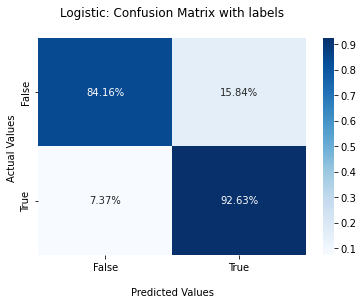

In [17]:
# Confusion Matrix
ax = sns.heatmap(
    confusion_matrix(
        y_test,
        lr_1.predict(X_test),
        normalize = 'true'
    ),
    annot=True, 
    fmt='.2%',
    cmap='Blues'
)

# Title and Labels
ax.set_title('Logistic: Confusion Matrix with labels\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix.
plt.show()

C:\Users\saiom\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


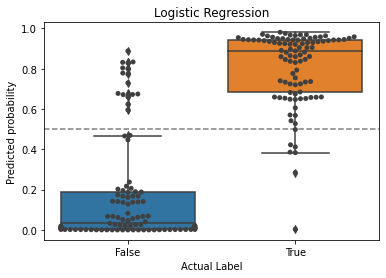

In [18]:
# Visualize with a box/swarmplot
ax = sns.boxplot(x=y_test, y=y_pred_log)
ax = sns.swarmplot(x=y_test, y=y_pred_log, color = ".25")
ax.axhline(0.5, ls = '--', color = 'grey')
ax.xaxis.set_ticklabels(['False','True'])
ax.set_xlabel('Actual Label')
ax.set_ylabel('Predicted probability')
ax.set_title('Logistic Regression')
plt.show()

**1.d.g      Question 14**

(g) Perform naive Bayes on the training data in order to predict
mpg01 using the variables that seemed most associated with mpg01
in (b). What is the test error of the model obtained?

In [19]:
#1.d.g
from sklearn.naive_bayes import GaussianNB

NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

y_pred = NB_model.predict(X_test)


print('Accuracy Score: ' + str(accuracy_score(y_test, y_pred)))
test_error = 1 - accuracy_score(y_test, y_pred)
print("Test Error: {:.2f}".format(test_error))

Accuracy Score: 0.8877551020408163
Test Error: 0.11


In [20]:
# Compute the accuracy
accuracies['NaiveBayes'] = accuracy_score(y_test, NB_model.predict(X_test))

# Print the accuracies
for model, accuracy in accuracies.items():
    print(f'{model} accuracy: {round(accuracy, 4)*100}%')

LDA accuracy: 88.78%
QDA accuracy: 88.27000000000001%
logit accuracy: 88.27000000000001%
NaiveBayes accuracy: 88.78%


**Chapter 5**

**2.a Question 5**

In [21]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
import statsmodels.api as sm

default_data = pd.read_csv('Data-Default.csv')

default_data.head()

np.random.seed(42)

C:\Users\saiom\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\saiom\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [22]:
default_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [23]:
default_data['student'] = default_data['student'].map({'Yes': 1, 'No': 0})
default_data['default'] = default_data['default'].map({'Yes': 1, 'No': 0})

**2.a.a)     Question 5**

Fit a logistic regression model that uses income and balance to predict default

In [24]:
X = default_data[['income', 'balance']]
X = sm.add_constant(X, prepend=True)
y = default_data['default']

model = LogisticRegression()
result = model.fit(X,y)

print(result.coef_)
result.predict(X)
print('Accuracy score: ' + str(accuracy_score(y, result.predict(X))))
print('Test error rate: ' + str(1 - accuracy_score(y, result.predict(X))))


[[-5.52286232e+00  1.76634049e-05  5.40961877e-03]]
Accuracy score: 0.9738
Test error rate: 0.0262


C:\Users\saiom\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


**2.a.b)    Question 5**

(b) Using the validation set approach, estimate the test error of this
model. In order to do this, you must perform the following steps:
    
i. Split the sample set into a training set and a validation set.

ii. Fit a multiple logistic regression model using only the training observations.

iii. Obtain a prediction of default status for each individual in the validation set by computing the posterior probability of default for that individual, and classifying the individual to the default category if the posterior probability is greater than 0.5.

iv. Compute the validation set error, which is the fraction of the observations in the validation set that are misclassified.

In [25]:
X = default_data[['income', 'balance']]
X = sm.add_constant(X, prepend=True)
y = default_data['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

mod = model.fit(X_train, y_train)


X_test = sm.add_constant(X_test, prepend=True)

print('Accuracy and test error before setting posterior probability >0.5')
print('Accuracy score: ' + str(accuracy_score(y_test, mod.predict(X_test))))
print('Test error: ' + str(1 - accuracy_score(y_test, mod.predict(X_test))) + '\n')


prob_05 = mod.predict(X_test) > 0.5
print('Accuracy and test error after setting posterior probability >0.5')
print('Estimated test error: '
      +str((len(y_test) - np.sum(prob_05 == y_test)) / (len(y_test))))

print('Estimated test error in percentage : 2.967%')

Accuracy and test error before setting posterior probability >0.5
Accuracy score: 0.9733333333333334
Test error: 0.026666666666666616

Accuracy and test error after setting posterior probability >0.5
Estimated test error: 0.02666666666666667
Estimated test error in percentage : 2.967%


C:\Users\saiom\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\saiom\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


**2.a.c)    Question 5**

(c) Repeat the process in (b) three times, using three different splits
of the observations into a training set and a validation set. Comment on the results obtained

In [26]:
X = default_data[['income', 'balance']]
X = sm.add_constant(X, prepend=True)
y = default_data['default']

for i in  [2,6,9]:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = i)

    mod = model.fit(X_train, y_train)


    X_test = sm.add_constant(X_test, prepend=True)
    
    print('Accuracy and test error before setting posterior probability >0.5')
    print('Accuracy score: ' + str(accuracy_score(y_test, mod.predict(X_test))))
    print('Test error: ' + str(1 - accuracy_score(y_test, mod.predict(X_test))))


    prob_05 = mod.predict(X_test) > 0.5
    print('Accuracy and test error after setting posterior probability >0.5')
    print("Estimated test error: "
      +str((len(y_test) - np.sum(prob_05 == y_test)) / (len(y_test))) + '\n')
    


Accuracy and test error before setting posterior probability >0.5


C:\Users\saiom\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\saiom\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\saiom\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


Accuracy score: 0.9763333333333334
Test error: 0.023666666666666614
Accuracy and test error after setting posterior probability >0.5
Estimated test error: 0.023666666666666666

Accuracy and test error before setting posterior probability >0.5
Accuracy score: 0.975
Test error: 0.025000000000000022
Accuracy and test error after setting posterior probability >0.5
Estimated test error: 0.025



C:\Users\saiom\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


Accuracy and test error before setting posterior probability >0.5
Accuracy score: 0.9783333333333334
Test error: 0.021666666666666612
Accuracy and test error after setting posterior probability >0.5
Estimated test error: 0.021666666666666667



Using three different random state values, our validation error remained fairly consistent with a maximum difference of aproximately 15%. Estimated test errors are 2.367%, 2.5% and 2.167% for random states 2,6,9 respectively. Average of these three is 2.34. The average is close to the test error obtained previously. THe differnce of approximately 14%, with the above one where nobody would default is greater than with the random states of 2, 6, 9. 


**2.a.d)    Question 5**

Now consider a logistic regression model that predicts the probability of default using income, balance, and a dummy variable
for student. Estimate the test error for this model using the validation set approach. Comment on whether or not including a
dummy variable for student leads to a reduction in the test error
rate.

In [27]:
#Dummy variable for Student and then perform model

X = default_data[['income', 'balance', 'student']]
X = sm.add_constant(X, prepend=True)
y = default_data['default']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

mod = model.fit(X_train, y_train)



print('Accuracy and test error before setting posterior probability >0.5')
print('Accuracy score: ' + str(accuracy_score(y_test, mod.predict(X_test))))
print('Test error: ' + str(1 - accuracy_score(y_test, mod.predict(X_test))))


prob_05 = mod.predict(X_test) > 0.5
print('Accuracy and test error after setting posterior probability >0.5')
print("Estimated test error: "
      +str((len(y_test) - np.sum(prob_05 == y_test)) / (len(y_test))) + '\n')

Accuracy and test error before setting posterior probability >0.5
Accuracy score: 0.9703333333333334
Test error: 0.02966666666666662
Accuracy and test error after setting posterior probability >0.5
Estimated test error: 0.029666666666666668



C:\Users\saiom\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


Including the dummy variable student resulted in an estimated validation error of 2.967%. This shows that adding a dummy variable student has not actually resulted in a reduction of test error rate. Rather, it resulted in an small increase of test error rate by 0.3%